In [78]:
# Importing Image from PIL package
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import plotly.express as px
import pandas as pd

In [69]:
def load_image(image_path):
    im = Image.open(image_path)
    im =im.resize((256,256))
    crop_box = (100, 100, 150, 150)
    img_cropped = im.crop(crop_box)
    return [img_cropped, im]

def show_image(image):
    img_resized = np.array(image)
    plt.grid()
    plt.imshow(img_resized)
    plt.show()

def color(image):
    redness = []
    for i in range(0,50):
        for j in range(0,50):
            redness.append(image.getpixel((i,j))[0])

    avg_redness = sum(redness) / len(redness)
    return avg_redness

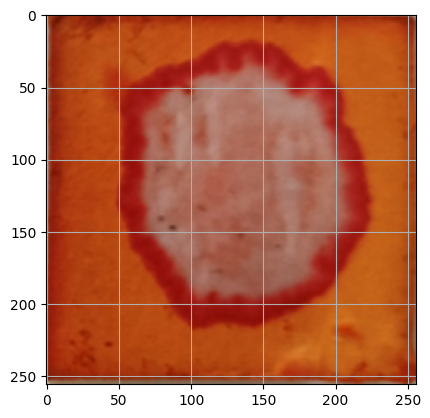

In [75]:
image_path = R"D:\sohamSir\image_analysis_and_color_estimation\data\external\10 ug Extracted Imgs\T0-3.tif" # input the path of the image
image = load_image(image_path)
show_image(image[1])

In [59]:
color(image[0])

153.1776

In [36]:
image_dir = R'D:\sohamSir\image_analysis_and_color_estimation\data\external\10 ug Extracted Imgs'
image_files = os.listdir(image_dir)

In [90]:
color_list = []
for image_file in image_files:
    # Construct the full image path
    image_path = os.path.join(image_dir, image_file)
    img = load_image(image_path)
    color_list.append(color(img[0]))

In [91]:
color_list = pd.DataFrame(color_list, columns= ['color'])

In [93]:
px.line(color_list, x = color_list.index, y = color_list['color'])